In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import glob
from tqdm import tqdm

Grab every FFI for sector 2, camera 2, chip 2 and get the median flux value for each one:

In [7]:
filenames = glob.glob('/mnt/ceph/users/dforeman/tess/ffis/tess/ffi/s0001/2018/*/2-2/*.fits')
filenames = np.array(filenames)

In [8]:
len(filenames)

1282

In [15]:
medians = []
ts = []
for fn in tqdm(filenames):
    with fits.open(fn) as sp:
        try:
            ts.append(sp[0].header['TSTART'])
            medians.append(np.nanmedian(sp[1].data))
        except:
            print('File {0} doesn\'t look right.'.format(fn))
            continue

100%|██████████| 1282/1282 [05:33<00:00,  4.18it/s]


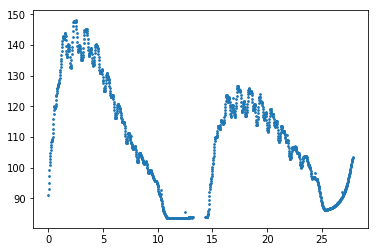

In [20]:
plt.scatter(ts - np.min(ts), medians, s=3)
plt.show()

In [22]:
f = open('../data/sector1_2_2_medians.csv','w')
f.write('start_time,median_flux\n')
for t,m in zip(ts, medians):
    f.write('{0:.8f}, {1:.8f}\n'.format(t,m))
f.close()

In [23]:
len(ts)

1282

In [40]:
emangles = np.genfromtxt('../data/emangles_S1_O9_d-54.dat', comments='#', encoding=None, dtype=None,
                         names=True)

In [44]:
emangles.dtype

dtype([('SCTime', '<i8'), ('Date', '<U10'), ('Time', '<U8'), ('Ddays', '<f8'), ('Ealt', '<f8'), ('Eaz', '<f8'), ('Edist', '<f8'), ('Malt', '<f8'), ('Maz', '<f8'), ('Mdist', '<f8'), ('FIN', '<i8'), ('TJD', '<f8')])

In [47]:
emangles['TJD']

array([1324.71, 1324.96, 1325.21, 1325.46, 1325.71, 1325.96, 1326.21,
       1326.46, 1326.71, 1326.96, 1327.21, 1327.46, 1327.71, 1327.96,
       1328.21, 1328.46, 1328.71, 1328.96, 1329.21, 1329.46, 1329.71,
       1329.96, 1330.21, 1330.46, 1330.71, 1330.96, 1331.21, 1331.46,
       1331.71, 1331.96, 1332.21, 1332.46, 1332.71, 1332.96, 1333.21,
       1333.46, 1333.71, 1333.96, 1334.21, 1334.46, 1334.71, 1334.96,
       1335.21, 1335.46, 1335.71, 1335.96, 1336.21, 1336.46, 1336.71,
       1336.96, 1337.21, 1337.46, 1337.71, 1337.96, 1338.21, 1338.46,
       1338.71, 1338.96, 1339.21, 1339.46, 1339.71, 1339.96, 1340.21,
       1340.46, 1340.71, 1340.96, 1341.21, 1341.46, 1341.71, 1341.96,
       1342.21, 1342.46, 1342.71, 1342.96, 1343.21, 1343.46, 1343.71,
       1343.96, 1344.21, 1344.46, 1344.71, 1344.96, 1345.21, 1345.46,
       1345.71, 1345.96, 1346.21, 1346.46, 1346.71, 1346.96, 1347.21,
       1347.46, 1347.71, 1347.96, 1348.21, 1348.46, 1348.71, 1348.96,
       1349.21, 1349

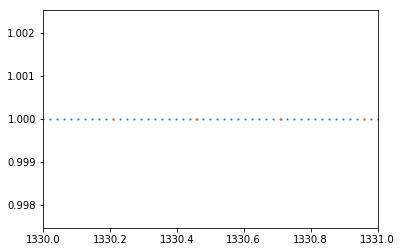

In [56]:
%matplotlib inline
plt.scatter(ts, np.ones_like(ts), s=1)
plt.scatter(emangles['TJD'], np.ones_like(emangles['TJD']), s=2)
plt.xlim([1330,1331]);